# The Life Cycle in a Data Science Project

1. **Exploratory Data Analysis.**
2. **Feature Engineering.**
3. **Feature Selection.**
4. **Model Building.**
5. **Model Deployment.**

****In this project we will follow the same cylce****

In [358]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://akm-img-a-in.tosshub.com/sites/btmt/images/stories/zomato-fact-sheet_505_052417055850_111517063712.jpg?size=1200:675")

In [260]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [261]:
df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

In [262]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### Column description

* **url** : contains the url of the restaurant in the zomato website
* **address** : contains the address of the restaurant in Bengaluru
* **name** : contains the name of the restaurant
* **online_order** : whether online ordering is available in the restaurant or not
* **book_table** : table book option available or not
* **rate** : contains the overall rating of the restaurant out of 5
* **votes** : contains total number of rating for the restaurant as of the above mentioned date
* **phone** : contains the phone number of the restaurant
* **location** : contains the neighborhood in which the restaurant is located
* **rest_type** : restaurant type
* **dish_liked** : dishes people liked in the restaurant
* **cuisines** : food styles, separated by comma
* **cost_two** : contains the approximate cost for meal for two people
* **reviews_list** : list of tuples containing reviews for the restaurant, each tuple
* **menu_item** : contains list of menus available in the restaurant
* **service_type** : type of meal
* **serve_to** : contains the neighborhood in which the restaurant is listed

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Checking for the missing values

In [264]:
pd.DataFrame(round(df.isnull().sum()/df.shape[0] * 100,3), columns = ['Missing'])

,Missing
url,0.000
address,0.000
name,0.000
online_order,0.000
book_table,0.000
rate,15.034
votes,0.000
phone,2.336
location,0.041
rest_type,0.439


* The variable `dish_liked` has more tha 50% of the missing data. If we drop the data we would lose 50% of the data. To simplify the analysis 
we are going to drop some of the unecessary columns `url`, `address`, `phone`.

In [265]:
df.drop(['url', 'address', 'phone'], axis=1, inplace = True)

### Renaming few columns for our convinience

In [266]:
df.rename(columns = {"approx_cost(for two people)" : "cost_two", "listed_in(type)" : "service_type", "listed_in(city)" : "serve_to"}, inplace = True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   cost_two      51371 non-null  object
 10  reviews_list  51717 non-null  object
 11  menu_item     51717 non-null  object
 12  service_type  51717 non-null  object
 13  serve_to      51717 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.5+ MB


In [268]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

# 1. Exploratory Data Analysis.

* As we have seen above that the variable `cost_two` has `object` data type so we need to convert it into `integer` data type so that we can analyze the variable

In [269]:
# Converting the cost_two variaible into integer
df.cost_two = df.cost_two.astype(str)
df.cost_two = df.cost_two.apply(lambda x : x.replace(',','')).astype(float)

* To convert the varible to a float we could simply do `astype(float)` but in this case, this method wont work because of presence of comma in between the numbers eg. 1,200. To avoid this kind of problem, we are using `lambda` and `replace` function to replace comma with nothing and then convert to float 

In [270]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

* We need to reply the `NEW` & `-` value from the rate column into `NaN` value to convert the `object` data type to `str`. 

In [271]:
df['rate'] = df.rate.replace('NEW', np.NaN)
df['rate'] = df.rate.replace('-', np.NaN)
df.rate = df.rate.astype(str)

In [272]:
df.rate = df.rate.apply(lambda x : x.replace('/5','')).astype(float)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking the count of each rating category present. 

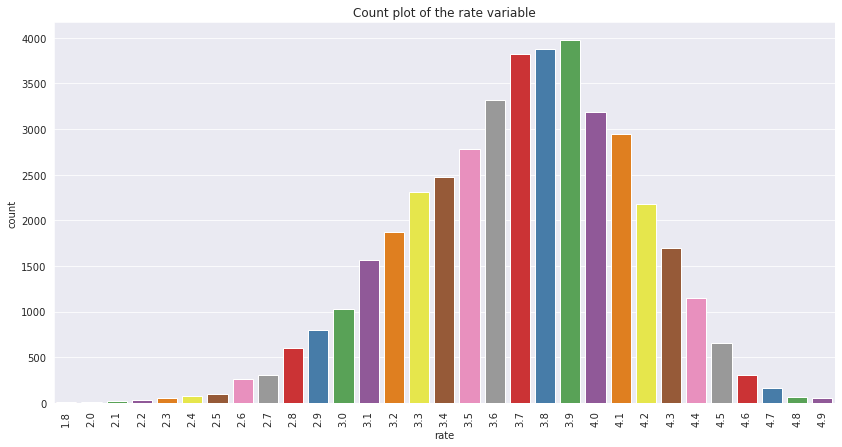

In [273]:
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df['rate'], palette='Set1')
plt.title("Count plot of the rate variable")
plt.xticks(rotation = 90)
plt.show()

* From the above `rate` distribution it nearly follows **normal distribution with a mean equal to 3.7**. The graph show that the majority of the restaurant rating lies between the **3.4 - 4.2**. Very few restaurants have rating 4.8.

In [274]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

### PLotting a joint plot for `rate` vs `votes`

* **Joint plot** allows us to compare two different variables and see if there is any relationship between these two variables. By using joint plot we can do both univariate and bivariate analysis by plotting the scatter plot (bivariate) and distribution plot (univariate) of two different variables in a single plotting grid

* **Univariate analysis** is the analysis of **one** (“uni”) variable. **Bivariate analysis** is the analysis of exactly **two** variables. **Multivariate analysis** is the analysis of **more than two** variables

<Figure size 1008x720 with 0 Axes>

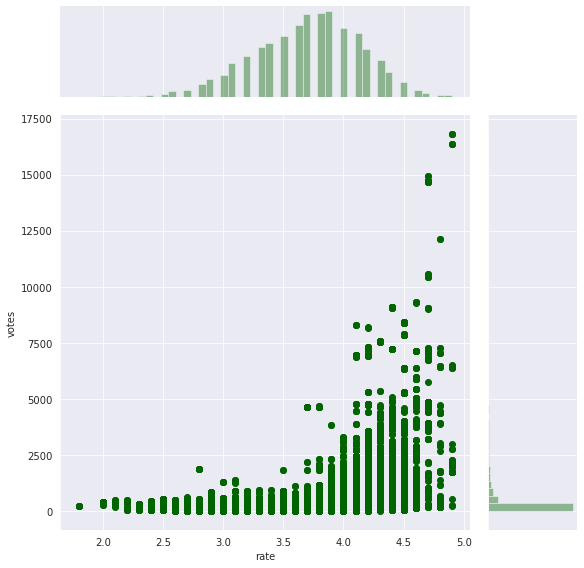

In [275]:
plt.figure(figsize=(14,10))
sns.set_style("darkgrid")
sns.jointplot(x = 'rate', y = 'votes', data=df, color = 'darkgreen',height = 8, ratio = 4)

* From the scatter plot we can see that the restaurants with higher number of rating has more votes. The distribution plot of `votes` on the right side indicates that the majority of votes pooled lie in bucket of 1000-2500. 

### Bar Plot

* Barplot is one of the mostt commonly used graphic to represent the data. Barplot represents the data in rectangular bars with the length of the bar proportional to the value of variable. We will analyze the variable `location` and see in which area most of the restaurants are located in Bangalore.

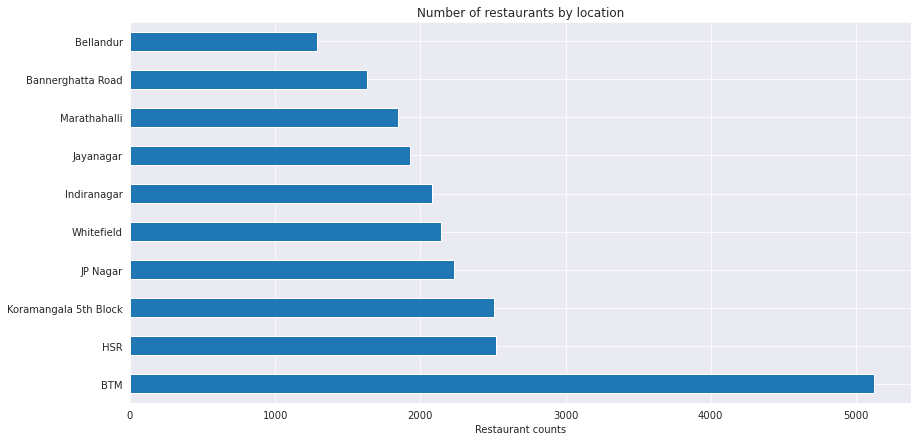

In [276]:
# Analyzing the number of locations with respect to the location

df.location.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.show()

* From the above visualization we can say that most number of the restaurants are located at **BTM** which makes it most popular residential and commercial and residential places in Banglore.

In [277]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost_two', 'reviews_list',
       'menu_item', 'service_type', 'serve_to'],
      dtype='object')

In [278]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Pie Chart

* **Pie chart** is a type of graph in which a circle is divided into sectors that each represent a proportion of the whole.
* With the help of pie chart we are going to plot how much percentage of online orders are been placed

In [279]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Online_orders', 'No_online_orders'], values = df['online_order'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

From the above pie chart we can say people tend to order online rather than going into to a restaurant and dining in.

In [280]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Restaurant Listed in

* Let's see to in which area most of the restaurants are listed in or deliver to

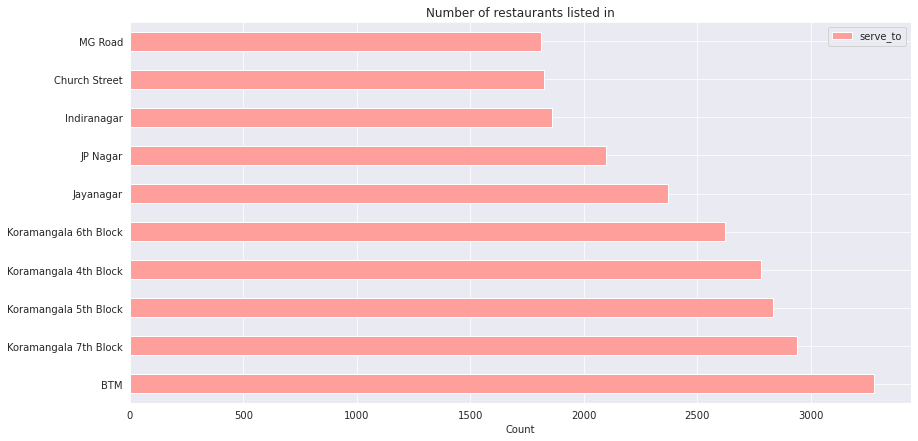

In [281]:
# Restaurants to serve to

df.serve_to.value_counts().nlargest(10).plot(kind = 'barh', color = 'r')
plt.title("Number of restaurants listed in")
plt.xlabel("Count")
plt.legend()
plt.show()

* As expected most of the restaurants listed_in deliver to **BTM** location because this area is home to over more than 3000 restaurants. Even though **Koramangaka 7th Block** dont have many restaurants still it stands second in terms of the m=number of restaurants that deliver to this location.

### Checking whether the online order facility impacts the rating of the restaurants

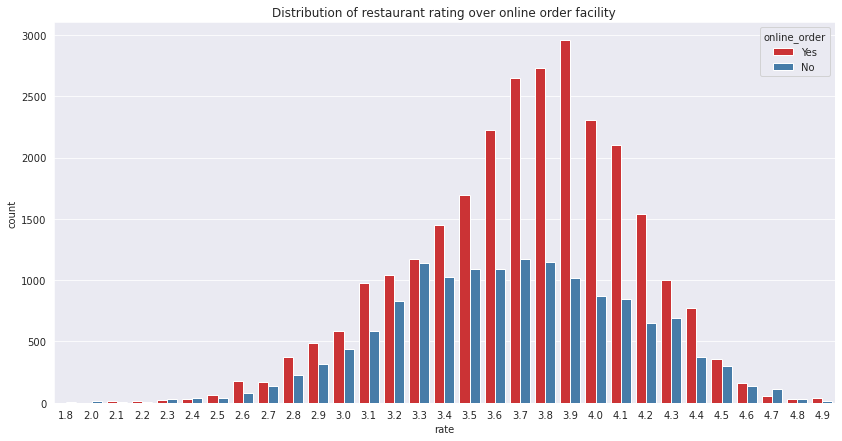

In [282]:
sns.countplot(x = df['rate'], hue = df['online_order'], palette= 'Set1')
plt.title("Distribution of restaurant rating over online order facility")
plt.show()

* We can clearly observer If the restaurant which dont have online order facility are more like to lose the rating as compared to the restuarants which have online order facility

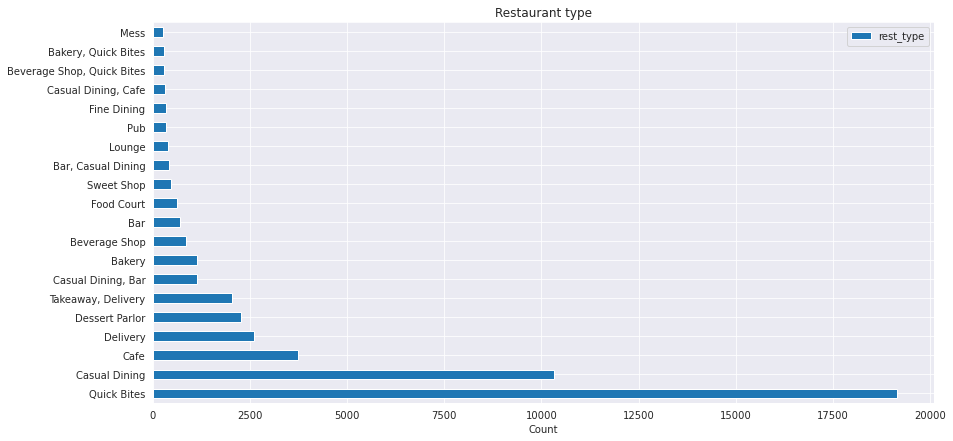

In [283]:
df.rest_type.value_counts().nlargest(20).plot(kind = 'barh')
plt.title("Restaurant type")
plt.xlabel("Count")
plt.legend()
plt.show()

* From the above visuals shows the top 20 restaurant type. We can see that the restaurant type `Quick Bites` is more popular among people as compared to the rest of the restaurant types.

In [284]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


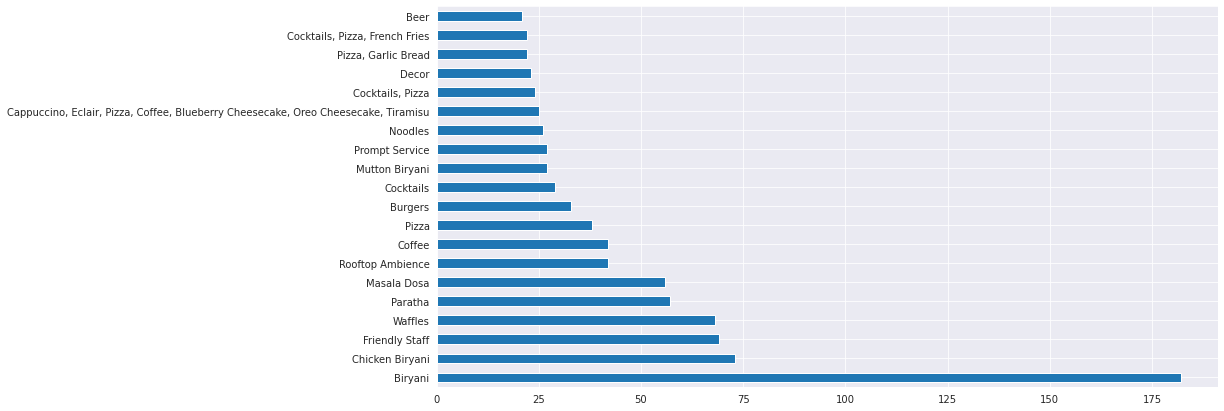

In [285]:
df.dish_liked.value_counts().nlargest(20).plot(kind = 'barh')
plt.show()

* We are able to see the top 20 dish's liked by the people. In this graph we can clearly see that the dish `Biryani` gains the top most position as compared to the rest of the dishes

In [286]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking which are the top 20 restaurants in Bangalore.

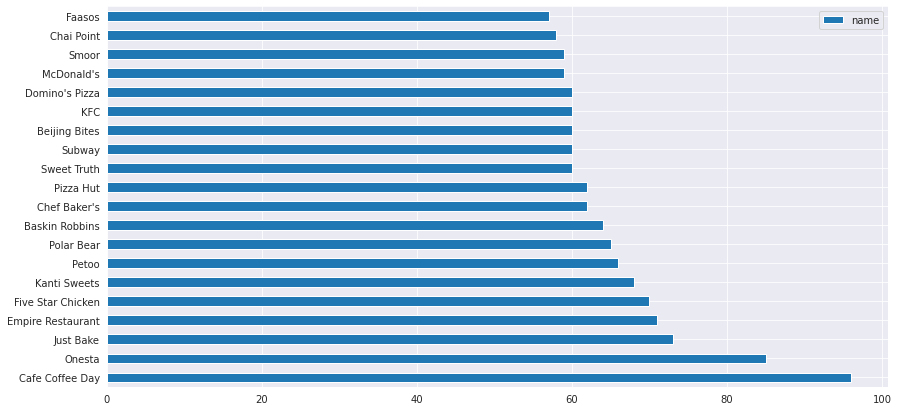

In [287]:
df.name.value_counts().nlargest(20).plot(kind = 'barh')
plt.legend()
plt.show()

* The restaurant which is more famous amongst people are `Cafe Coffee Day`.

In [288]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking whether the online table booking affects the rating of the restaurant

In [289]:
# Plotting a pie chart for online orders

trace = go.Pie(labels = ['Table_booking_available', 'No_table_booking_available'], values = df['book_table'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of order variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

* From the above Pie chart we can see that 87.5% of the restaurants have table booking facility available and 12.5% dont have table booking available.

* Now lets check how to rating affects if the restaurant has table booking or not.

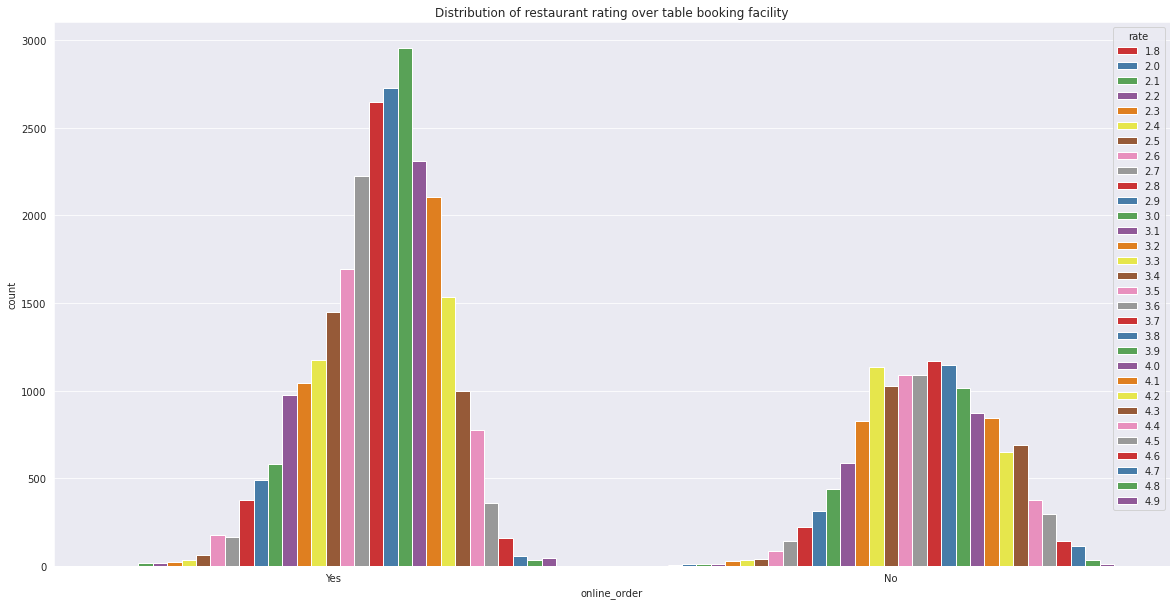

In [290]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['online_order'], hue = df['rate'], palette= 'Set1')
plt.title("Distribution of restaurant rating over table booking facility")
plt.show()

* We can clearly see that the ratings affects drastically if the restaurant has table booking or not. The restaurants which are having table booking facility tends to have higher ratings as compared to the restaurants which dont have table booking facility available with them.

## Comparing Biggest Restaurant Chain and Best Restaurant Chain

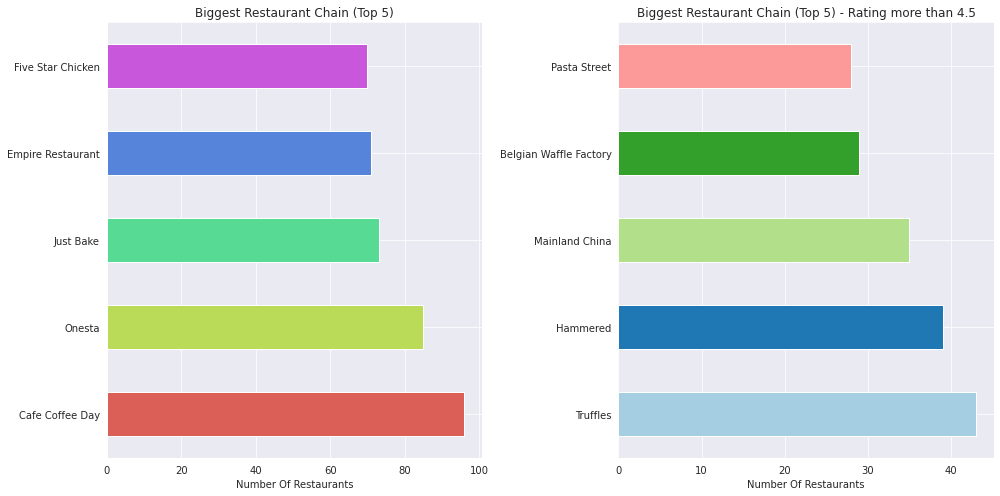

In [291]:
plt.rcParams['figure.figsize'] = 14,7
plt.subplot(1,2,1)

df.name.value_counts().head().plot(kind = 'barh', color = sns.color_palette("hls", 5))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5)")

plt.subplot(1,2,2)

df[df['rate'] >= 4.5]['name'].value_counts().nlargest(5).plot(kind = 'barh', color = sns.color_palette("Paired"))
plt.xlabel("Number Of Restaurants")
plt.title("Biggest Restaurant Chain (Top 5) - Rating more than 4.5")
plt.tight_layout()

* `Cafe Coffee Day` chain has over 90 cafes across the city that are listed in Zomato. On the other hand, **Truffles** - a burger chain has the best fast food restaurant (rating more than 4.5 out of 100), quality over quantity.

* If you visit Banglore next time and if you want to check out a good restaurant over a weekend dont forget to try the food at **Truffles**, **Hammered** and **Mainland China**.


# 2. Feature Engineering.

In [292]:
# checking for null values
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost_two          346
reviews_list        0
menu_item           0
service_type        0
serve_to            0
dtype: int64

In [293]:
# Replacing the NaN values in rate feature

df['rate'] = df['rate'].fillna(df['rate'].mean())

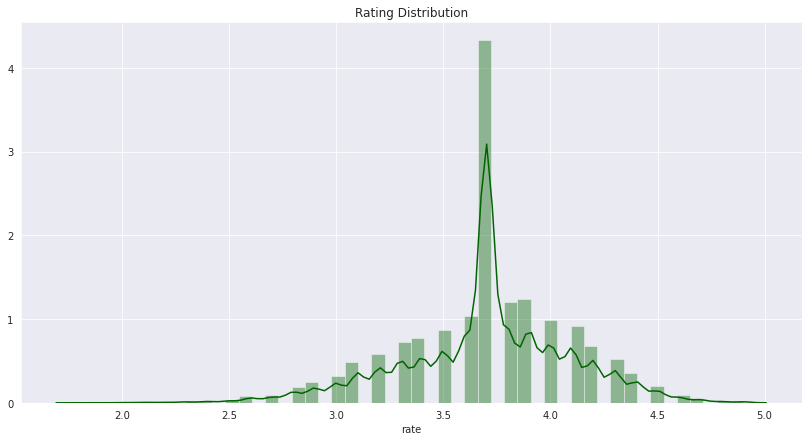

In [294]:
# Plotting a distplot
sns.distplot(df['rate'], color = 'darkgreen')
plt.title('Rating Distribution')
plt.show()

* The rating feature follows a normal distribution

In [295]:
# Replacing the NaN values for cost_two

df.cost_two.value_counts().mean()

733.8714285714286

In [296]:
# Replacing the NaN values for the cost_two feature with mean value

df['cost_two'] = df['cost_two'].fillna(df['cost_two'].mean())

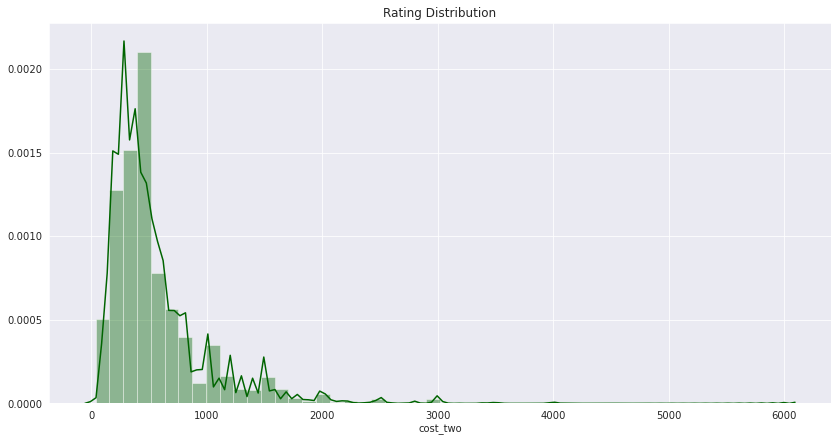

In [297]:
# Plotting a distplot for cost_two feature
sns.distplot(df['cost_two'], color = 'darkgreen')
plt.title('Rating Distribution')
plt.show()

* The cost two feature also follows nearly normal distribution

In [298]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Converting the categorical columns into integer

* We will perform One Hot Encoding operation on `online_order`,`book_table`,`location`,`rest_type`, `cuisines` columns.

In [299]:
df['online_order'] = pd.get_dummies(df['online_order'], drop_first=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [300]:
df['book_table'] = pd.get_dummies(df['book_table'], drop_first=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,reviews_list,menu_item,service_type,serve_to
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [301]:
# Performing One Hot Encoding on rest_type

get_dummies_rest_type = pd.get_dummies(df.rest_type)
get_dummies_rest_type.head(3)

,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk","Bakery, Quick Bites","Bakery, Sweet Shop",Bar,"Bar, Cafe",...,"Quick Bites, Food Court","Quick Bites, Kiosk","Quick Bites, Meat Shop","Quick Bites, Mess","Quick Bites, Sweet Shop",Sweet Shop,"Sweet Shop, Dessert Parlor","Sweet Shop, Quick Bites",Takeaway,"Takeaway, Delivery"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
# Performing One Hot Encoding on location

get_dummies_location = pd.get_dummies(df.location)
get_dummies_location.head(3)

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
# Performing One Hot Encoding on type

get_dummies_service_type = pd.get_dummies(df.service_type)
get_dummies_service_type.head(3)

,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0


In [304]:
# Concatinating the dataframes
final_df = pd.concat([df,get_dummies_rest_type,get_dummies_service_type, get_dummies_location], axis = 1)
final_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
final_df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost_two,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
final_df = final_df.drop(["name","rest_type","location", 'cuisines', 'dish_liked', 'reviews_list'],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,menu_item,service_type,serve_to,Bakery,"Bakery, Beverage Shop",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
final_df.head()

,online_order,book_table,rate,votes,cost_two,menu_item,service_type,serve_to,Bakery,"Bakery, Beverage Shop",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,[],Buffet,Banashankari,0,0,...,0,0,0,0,0,0,0,0,0,0


In [310]:
final_df = final_df.drop(["menu_item","service_type","serve_to"],axis = 1)
final_df.head()

,online_order,book_table,rate,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


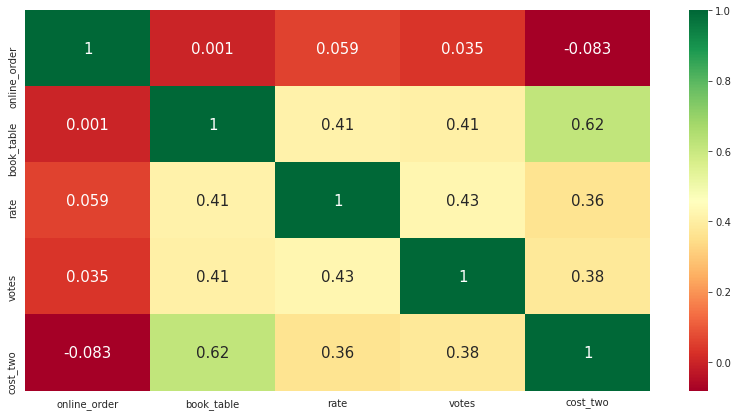

In [311]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# 3. Feature Selection

In [312]:
# Splitting the features into independent and dependent variables

x = final_df.drop(['rate'], axis = 1)
x.head()

,online_order,book_table,votes,cost_two,Bakery,"Bakery, Beverage Shop","Bakery, Cafe","Bakery, Dessert Parlor","Bakery, Food Court","Bakery, Kiosk",...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,1,1,775,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,787,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,918,800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,88,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,166,600.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
y = final_df['rate']

### Feature importance

* Feature importance gives you a score for each feature of your data, the higher the score the more important or relevant is the feature towards your output variable

* Feature importance is an in built class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset

In [314]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [315]:
print(model.feature_importances_)

[ 2.36237443e-02  1.69278644e-01  3.44723702e-01  1.03654865e-01
  1.97555870e-03  9.69451563e-08  6.21028638e-04  8.02627063e-04
  5.09032578e-05  7.60214014e-17  2.20558691e-03  5.55816892e-18
  2.42717334e-03  8.57926408e-06  1.33961184e-03  5.15840373e-06
  1.16056476e-04  5.96783545e-06  1.97443265e-03  4.92258687e-05
  4.56749508e-04  9.17962925e-04  5.75575706e-07  1.02748928e-02
  6.72807555e-04  7.11475605e-05  1.29013803e-03  2.03584477e-03
  3.60321536e-05  4.69392024e-05  3.89055840e-04  1.26750695e-02
  2.94295165e-03  7.60395183e-04  2.20272986e-06  7.13137989e-05
  1.12488377e-04  1.22993040e-04  1.13059925e-06  4.09482998e-05
  1.48618906e-04  3.24988889e-06  2.12592535e-05  5.39055349e-03
  1.25759815e-02  2.25293720e-04  4.22371444e-04  2.28148583e-03
  3.35825450e-06  8.68288257e-05  9.42185287e-04  1.66771776e-05
  1.97515489e-04  5.85597851e-04  3.95823955e-05  6.62039798e-07
  2.63952329e-06  3.10619916e-03  1.48022995e-06  9.19485593e-05
  8.55850116e-06  7.20470

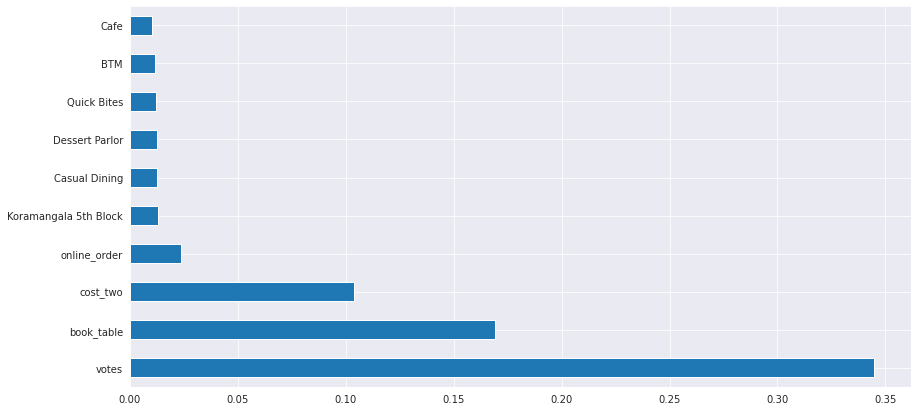

In [319]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

* From the above graph we can see the top 10 most important features which are very important to train our model and get correct predictions. We will be using these features for our model building.

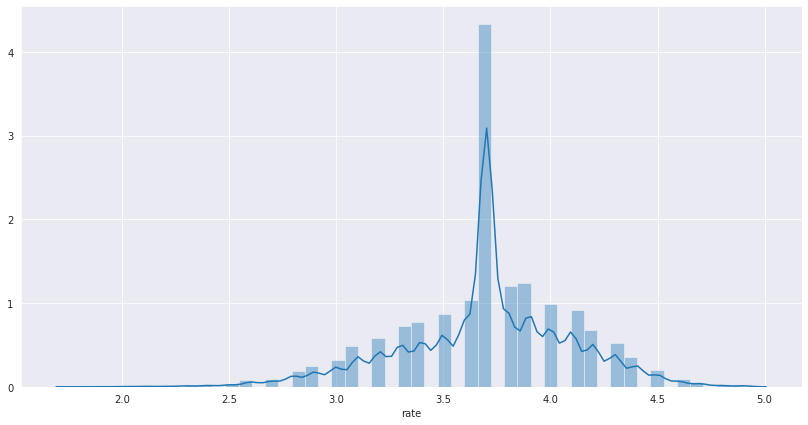

In [321]:
sns.distplot(df['rate'])

# 4. Model Building

In [322]:
#Spliting data into test and train

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

## Applying Linear Regression Algorithm

In [323]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [324]:
r2 = r2_score(y_test,lr_pred)
print('R-Square Score: ',r2*100)

R-Square Score:  32.58628635988953


In [329]:
# Calculate the absolute errors
lr_errors = abs(lr_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lr_pred), 2), 'degrees.')

Mean Absolute Error: 3.7 degrees.


In [331]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (lr_errors / y_test)
# Calculate and display accuracy
lr_accuracy = 100 - np.mean(mape)
print('Accuracy for Logistic Regression is :', round(lr_accuracy, 2), '%.')

Accuracy for Logistic Regression is : 93.0 %.


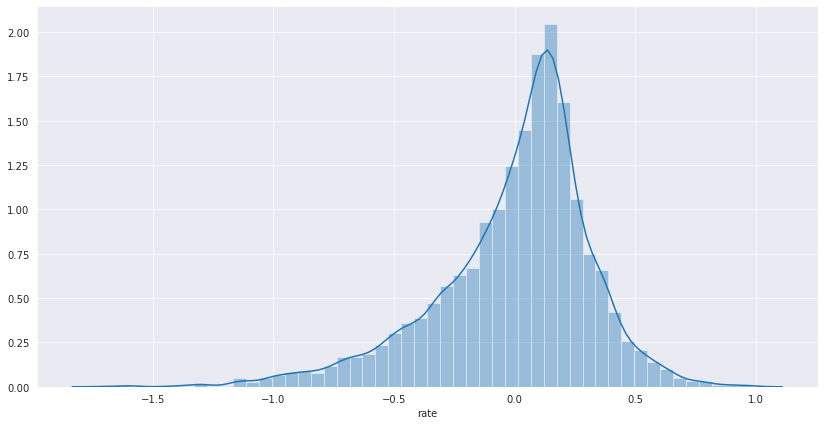

In [333]:
sns.distplot(y_test-lr_pred)

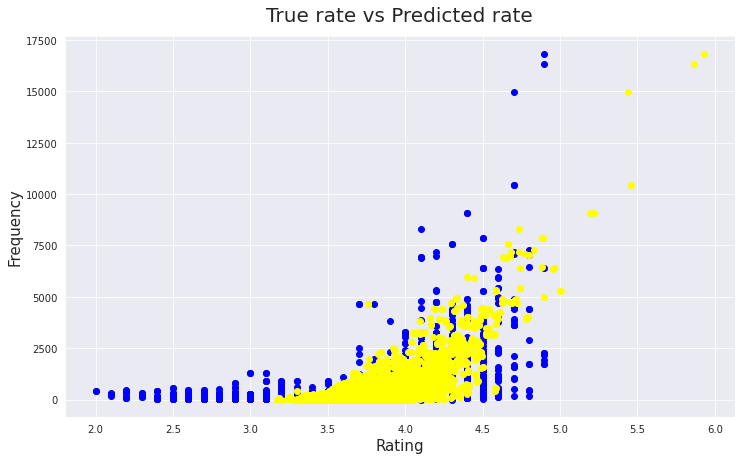

In [355]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(lr_pred,x_test.iloc[:,2],color="yellow")

In [335]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [337]:
print('mse:',metrics.mean_squared_error(y_test, lr_pred))
print('mae:',metrics.mean_absolute_error(y_test, lr_pred))


mse: 0.10476148287875722
mae: 0.24332236730903115


# Applying Decision tree Regressor

In [338]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [339]:
dtree_pred = dtree.predict(x_test)

In [347]:
r2 = r2_score(y_test,dtree_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
dtree_errors = abs(dtree_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dtree_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (dtree_errors / y_test)
# Calculate and display accuracy
dtree_accuracy = 100 - np.mean(mape)
print('Accuracy for Decision tree regressor is :', round(dtree_accuracy, 2), '%.')

R-Square Score:  87.59955810740992
Mean Absolute Error: 3.7 degrees.
Accuracy for Decision tree regressor is : 98.91 %.


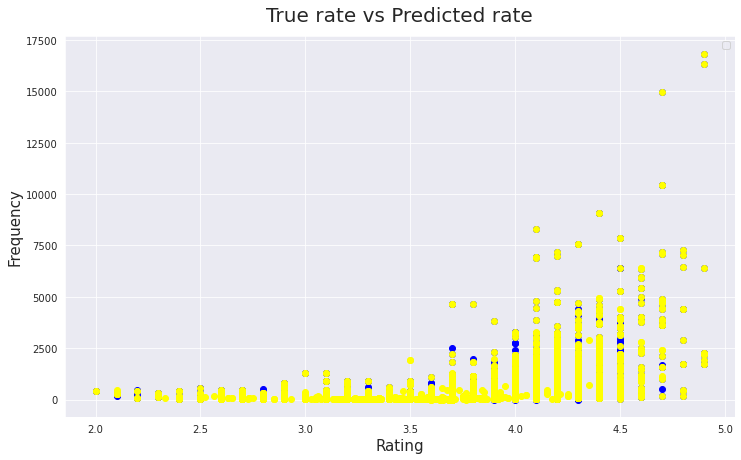

In [354]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(dtree_pred,x_test.iloc[:,2],color="yellow")
plt.legend()

# Applying Random Forest Regressor Algorithm

In [344]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [345]:
rf_pred = random_forest_regressor.predict(x_test)

In [348]:
r2 = r2_score(y_test,rf_pred)
print('R-Square Score: ',r2*100)

# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_pred), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_errors / y_test)
# Calculate and display accuracy
rf_accuracy = 100 - np.mean(mape)
print('Accuracy for random forest regressor is :', round(rf_accuracy, 2), '%.')

R-Square Score:  90.40589564943963
Mean Absolute Error: 3.7 degrees.
Accuracy for random forest regressor is : 98.51 %.


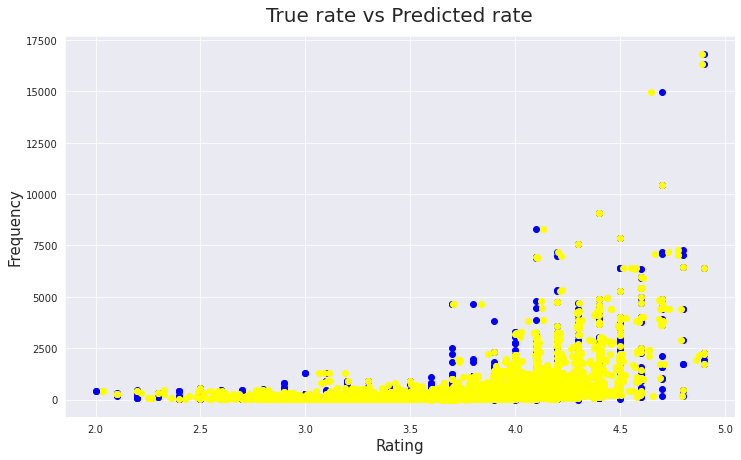

In [352]:
#plotting the Random forest values predicated Rating

plt.figure(figsize=(12,7))

plt.scatter(y_test,x_test.iloc[:,2],color="blue")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(rf_pred,x_test.iloc[:,2],color="yellow")

# 5. Model Deployment

In [359]:
import pickle

In [360]:
# For Logistic Regression

# open a file where you want to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [361]:
# For Decision Tree Regressor

# open a file where you want to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(dtree, file)

In [ ]:
# For Random Forest Regressor

# open a file where you want to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_regressor, file)